### Storytelling sobre Inclusión financiera en Colombia

#### Objetivo

Evaluar la disponibilidad y utilización de productos financieros en diferentes segmentos de la población en Colombia, utilizando datos de corresponsales, cuentas, créditos y microcréditos.

Este objetivo se enfoca en examinar cómo los productos financieros, como cuentas, créditos y microcréditos, están disponibles y son utilizados por diferentes segmentos de la población en Colombia. Segmentando la población por características demográficas, como género, edad, nivel socioeconómico o ubicación geográfica, y analizar la variación en la adopción y uso de los productos financieros entre estos segmentos.

De esta forma podre tener una visión más detallada de cómo se distribuyen los productos financieros entre diferentes segmentos de la población y si existen disparidades o áreas de oportunidad para mejorar la inclusión financiera en grupos específicos.

Para esta tarea he utilizado una base de datos obtenida del banco de datos del Gobierno de Colombia (DANE) que se encarga de registrar datos exactos y especifios de cada una las entidades bancarias. 

Para que pueda ser revisado, adjunto el enlace del mismo: [Ver Data](https://www.datos.gov.co/Econom-a-y-Finanzas/Inclusi-n-Financiera/ptgf-ywrb/data)

Tambien para apoyar la dato, he comentado algunos datos que nos podrian ayudar a crear un universo descrito, por lo siguiente:

- Población en Colombia: Según el Departamento Administrativo Nacional de Estadística (DANE), la proyección de población para 2021 en Colombia es de aproximadamente 50.3 millones de habitantes. Este dato es fundamental para comprender el tamaño del mercado y la base potencial de clientes para las entidades bancarias.

- Acceso a servicios financieros: Según el Informe de Inclusión Financiera del Banco Mundial, aproximadamente el 79% de los adultos en Colombia tenían acceso a servicios financieros formales en 2018. Este dato muestra el nivel general de acceso a servicios bancarios en el país.

- Cuentas bancarias: Según la Superintendencia Financiera de Colombia, hasta marzo de 2021, había alrededor de 52.5 millones de cuentas de ahorro y corrientes en el país. Este dato refleja el número total de cuentas bancarias utilizadas por la población.

- Uso de canales digitales: De acuerdo con el Informe de Pagos Digitales del Banco de la República, en 2020 se registraron más de 113 millones de transacciones por medios electrónicos y digitales en Colombia. Esto indica el crecimiento y la adopción de canales digitales para realizar operaciones financieras.

- cceso a crédito: Según la Superintendencia Financiera de Colombia, hasta marzo de 2021, el saldo de la cartera de crédito en el país ascendía a aproximadamente 457 billones de pesos colombianos. Este dato muestra el uso de productos de crédito por parte de la población para financiar diferentes necesidades.


#### Tabla de Contenido

1. Introducción
2. Descripción de la Data
3. Análisis Geográfico
    - Departamentos con mayor presencia de entidades bancarias
    - Municipios con mayor número de corresponsales propios y tercerizados
4. Uso de Entidades Bancarias
    - Número de corresponsales activos por entidad
    - Número de depósitos realizados
    - Monto total de los depósitos
    - Número de giros enviados y recibidos
    - Número de pagos y montos
    - Número de retiros y montos
    - Número de transferencias y montos
    - Número total de transacciones y monto total

### 2. Descripción de la Data

El conjunto de datos proporciona información detallada sobre el uso de productos financieros y la cobertura en Colombia. Se recopilaron datos de diversas entidades bancarias en el país, abarcando un período de tiempo específico. El conjunto de datos consta de más de 60,000 filas y 87 columnas, brindando una amplia gama de información sobre la inclusión financiera en el país.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = 'Inclusion_Financiera.csv'
data = pd.read_csv(DATA_PATH)

In [3]:
print(data.columns)

Index(['TIPO DE ENTIDAD', 'CODIGO DE LA  ENTIDAD', 'NOMBRE DE LA  ENTIDAD',
       'FECHA DE CORTE', 'UNIDAD DE CAPTURA', 'DEPARTAMENTO', 'RENGLON',
       'MUNICIPIO', 'TIPO', 'NRO CORRESPONSALES PROPIOS',
       'NRO CORRESPONSALES TERCERIZADOS', 'NRO CORRESPONSALES ACTIVOS',
       'NRO CORRESPONSALES', 'NRO DEPOSITOS', 'MONTO DEPOSITOS',
       'NRO GIROS ENVIADOS ', 'MONTO GIROS ENVIADOS ', 'NRO GIROS RECIBIDOS',
       'MONTO GIROS RECIBIDOS', 'NRO PAGOS', 'MONTO PAGOS', 'NRO RETIROS',
       'MONTO RETIROS', 'NRO TRANSFERENCIAS', 'MONTO TRANSFERENCIAS',
       'NRO TOTAL ', 'MONTO TOTAL', 'NRO CTA AHORRO HASTA 1 SMMLV',
       'SALDO CTA AHORRO HASTA 1 SMMLV',
       'NRO CTA AHORRO > 1 SMMLV HASTA 3 SMMLV',
       'SALDO CTA AHORRO> 1 SMMLV HASTA 3 SMMLV',
       'NRO CTA AHORRO> 3 SMMLV HASTA 5 SMMLV',
       'SALDO CTA AHORRO> 3 SMMLV HASTA 5 SMMLV', 'NRO CTA AHORRO ACTIVAS',
       'SALDO CTA AHORRO ACTIVAS', 'NRO CTA AHORRO MUJERES',
       'SALDO CTA AHORRO MUJERES', 'NRO 

In [4]:
### generación de data wrangling a la tabla

# Descartar columnas no deseadas
columnas_descartadas = ['TIPO DE ENTIDAD', 'CODIGO DE LA  ENTIDAD', 'RENGLON', 'UNIDAD DE CAPTURA']
data_descartada = data.drop(columns=columnas_descartadas)


# Rellenar valores faltantes con cero
data = data.fillna(0)






In [5]:
data_descartada.head(5)


,NOMBRE DE LA ENTIDAD,FECHA DE CORTE,DEPARTAMENTO,MUNICIPIO,TIPO,NRO CORRESPONSALES PROPIOS,NRO CORRESPONSALES TERCERIZADOS,NRO CORRESPONSALES ACTIVOS,NRO CORRESPONSALES,NRO DEPOSITOS,...,NRO MICROCREDITO> 10SMMLV HASTA 25SMMLV,MONTO MICROCREDI> 10SMMLV HASTA 25SMMLV,NRO MICROCREDITO MUJERES,MONTO MICROCREDITO MUJERES,NRO MICROCREDITO HOMBRES,MONTO MICROCREDITO HOMBRES,NRO TOTAL MICROCREDITO,MONTO TOTAL MICROCREDITO,NRO PROD DEPOSITO NIVEL NACIONAL,MONTO PROD DEPOSITO NIVEL NACIONAL
0,Banco Davivienda,31/12/2017,ANTIOQUIA,URRAO,TRANS Y TRAMITES EN CORRESPONSALES,0,0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
1,Citibank,31/12/2017,ANTIOQUIA,CONCORDIA,TRANS Y TRAMITES EN CORRESPONSALES,0,0,0,0,42,...,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
2,Banco De Bogota,31/12/2017,ANTIOQUIA,ITAGUI,CREDITO DE VIVIENDA,0,0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
3,Coopcentral,31/12/2017,ANTIOQUIA,MEDELLIN,MICROCREDITO,0,0,0,0,0,...,0,0.0,0,0.0,1,29000000.0,1,29000000.0,0.0,0.0
4,Bancamía S.A.,31/12/2017,ANTIOQUIA,SAN CARLOS,CORRESPONSALES,0,1,1,1,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0


En tabla anterior puedo enumerar 5 columnas que pueden ser las más relevantes para este documento:

- Municipio: Esta columna indica el municipio donde se encuentra ubicada cada entidad bancaria. Es relevante para identificar la distribución geográfica de las entidades y analizar su cobertura en diferentes regiones.

- Tipo: Esta columna clasifica el tipo de entidad bancaria, como banco comercial, cooperativa de crédito, entidad estatal, entre otros. Esta información es útil para comprender la diversidad de actores en el sistema financiero y su participación en la inclusión financiera.

- Número de corresponsales activos: Esta columna muestra la cantidad de corresponsales activos que tiene cada entidad bancaria. Los corresponsales son agentes autorizados que brindan servicios financieros en áreas donde no hay presencia física de una entidad bancaria. Este dato permite evaluar la infraestructura de atención al cliente y su impacto en la cobertura financiera.

- Número de depósitos: Esta columna registra el número de depósitos realizados en cada entidad bancaria. Es un indicador importante para comprender el nivel de actividad y confianza de los clientes en los servicios financieros ofrecidos.

- Número de créditos de consumo: Esta columna muestra la cantidad de créditos de consumo otorgados por cada entidad bancaria. Permite analizar el acceso y la utilización de productos de crédito por parte de la población, lo cual puede ser un indicador de la capacidad de consumo y el nivel de endeudamiento de los usuarios.


Al igual, hice una pequeña táctica de data wrangling para limpiar de tres columnas y rellnar campos en 0 que a mi parecer es lo mas apropiado para esta tabla.

### 3. Análisis Geográfico

In [6]:
#Selecciono las columnas que necesito para este análisis y genero una nueva tabla

columnas_geograficas = ["DEPARTAMENTO", "MUNICIPIO"]
data_geografica = data[columnas_geograficas]


In [7]:
# Despues entro a la exploración de la data de esta tabla
# Distribución de los departamentos
#departamentos = data_geografica["DEPARTAMENTO"].value_counts()
#print(departamentos)

# Lista de departamentos a omitir
departamentos_omitidos = ["AGREGADORES DE CORRESPONSALES", "CORRESPONSALES TIPO NEGOCIO", "CUENTAS DE AHORRO",
                          "CUENTAS DE AHORRO ELECTRONICAS", "CUENTAS DE AHORRO TRAMITE SIMPLIFICADO",
                          "DEPOSITOS DINERO ELECT TRAMITE SIMPLIFI", "DEPOSITOS DINERO ELECTRONICO",
                          "NARIÃ‘O", "NARIï¾‘O", "TOTAL NACIONAL"]

# Filtrar el DataFrame para excluir los departamentos omitidos
data_filt = data_geografica[~data_geografica["DEPARTAMENTO"].isin(departamentos_omitidos)]

# Contar los departamentos después de omitir los departamentos específicos
departamentos = data_filt["DEPARTAMENTO"].value_counts()
print(departamentos)



ANTIOQUIA                           74620
CUNDINAMARCA                        60143
BOYACA                              47708
SANTANDER                           40649
VALLE DEL CAUCA                     31592
TOLIMA                              27052
NARIﾑO                              24395
HUILA                               22115
BOLIVAR                             20817
CAUCA                               20666
NORTE DE SANTANDER                  19503
CORDOBA                             18645
CALDAS                              17179
META                                17037
ATLANTICO                           15472
CESAR                               15145
MAGDALENA                           14789
SUCRE                               13871
CASANARE                            11597
RISARALDA                           10672
QUINDIO                              9341
LA GUAJIRA                           9305
CAQUETA                              9130
CHOCO                             

In [8]:
# Distribución de los departamentos
municipios = data_geografica["MUNICIPIO"].value_counts()
print(municipios)

TOTAL NACIONAL                 2801
LA UNION                       2674
SANTAFE DE BOGOTA D.           2535
TOTAL BOGOTﾁ                   2359
TOTAL ANTIOQUIA                2278
                               ... 
ESTABLECIMIENTOS DE CRÉDITO       2
SAN FELIPE                        2
PACOA                             2
CACAHUAL                          1
PUERTO ALEGRÍA                    1
Name: MUNICIPIO, Length: 1167, dtype: int64


c:\Users\jacz0\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jacz0\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65425 (\N{HALFWIDTH KATAKANA LETTER MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


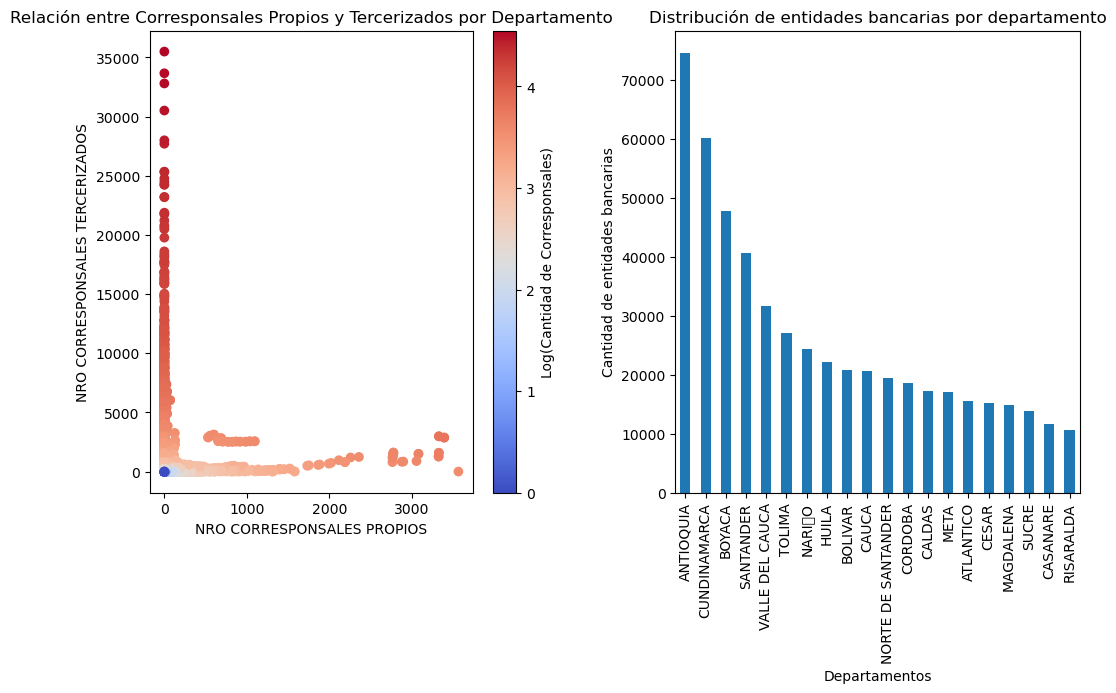

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar los datos relevantes y eliminar filas con valores faltantes (NaN)
data_filt = data[['DEPARTAMENTO', 'NRO CORRESPONSALES PROPIOS', 'NRO CORRESPONSALES TERCERIZADOS']].dropna()

# Excluir la categoría "Total Nacional"
data_filt = data_filt[data_filt['DEPARTAMENTO'] != 'TOTAL NACIONAL']

# Obtener la lista de departamentos y seleccionar los primeros 20
departamentos = data_filt['DEPARTAMENTO'].value_counts().head(20)

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de dispersión de corresponsales propios y tercerizados por departamento
x = data_filt['NRO CORRESPONSALES PROPIOS']
y = data_filt['NRO CORRESPONSALES TERCERIZADOS']
c = np.log10(x + y)
scatter = ax1.scatter(x, y, c=c, cmap='coolwarm')
ax1.set_xlabel('NRO CORRESPONSALES PROPIOS')
ax1.set_ylabel('NRO CORRESPONSALES TERCERIZADOS')
ax1.set_title('Relación entre Corresponsales Propios y Tercerizados por Departamento')
fig.colorbar(scatter, ax=ax1, label='Log(Cantidad de Corresponsales)')

# Gráfico de barras de la distribución de entidades bancarias por departamento
departamentos.plot(kind="bar", ax=ax2)
ax2.set_xlabel("Departamentos")
ax2.set_ylabel("Cantidad de entidades bancarias")
ax2.set_title("Distribución de entidades bancarias por departamento")

# Ajustar los espacios entre los subplots
plt.subplots_adjust(wspace=0.3)

# Mostrar la figura con ambos gráficos
plt.show()


En los gráficos anteriores, se observa que las regiones con mayor presencia de entidades bancarias en Colombia son Antioquia, Cundinamarca y Boyacá, superando significativamente a otras ciudades y departamentos. Además, se destaca que el modelo más exitoso para estas entidades es la tercerización de corresponsales. Esta estrategia les permite alcanzar a poblaciones ubicadas en áreas remotas, brindando acceso a servicios financieros a personas que de otra manera tendrían dificultades para acceder a productos bancarios.

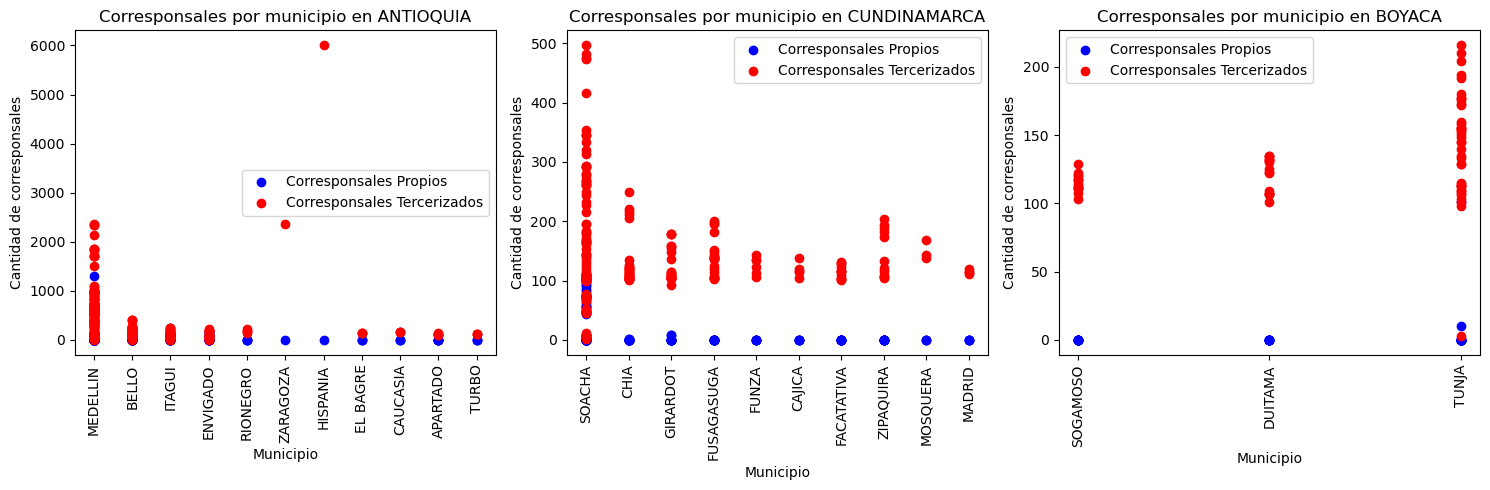

In [10]:
import matplotlib.pyplot as plt

# Filtrar los datos por los departamentos de interés
departamentos_interes = ['ANTIOQUIA', 'CUNDINAMARCA', 'BOYACA']

# Crear una figura con 3 subplots, uno para cada departamento
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Generar los gráficos para cada departamento
for i, departamento in enumerate(departamentos_interes):
    # Filtrar los datos por el departamento actual
    data_departamento = data[data['DEPARTAMENTO'] == departamento]

    # Filtrar las filas que indican el total
    data_departamento = data_departamento[~data_departamento['MUNICIPIO'].str.contains('TOTAL')]

    # Obtener los municipios y los corresponsales propios y tercerizados del departamento
    municipios = data_departamento['MUNICIPIO']
    corresponsales_propios = data_departamento['NRO CORRESPONSALES PROPIOS']
    corresponsales_tercerizados = data_departamento['NRO CORRESPONSALES TERCERIZADOS']

    # Filtrar los municipios que tienen más de 500 corresponsales
    municipios_filt = municipios[corresponsales_propios + corresponsales_tercerizados > 100]
    corresponsales_propios_filt = corresponsales_propios[corresponsales_propios + corresponsales_tercerizados > 100]
    corresponsales_tercerizados_filt = corresponsales_tercerizados[corresponsales_propios + corresponsales_tercerizados > 100]

    # Generar el gráfico de dispersión para el departamento actual
    axs[i].scatter(municipios_filt, corresponsales_propios_filt, label='Corresponsales Propios', color='blue')
    axs[i].scatter(municipios_filt, corresponsales_tercerizados_filt, label='Corresponsales Tercerizados', color='red')

    # Personalizar el gráfico
    axs[i].set_xlabel('Municipio')
    axs[i].set_ylabel('Cantidad de corresponsales')
    axs[i].set_title(f'Corresponsales por municipio en {departamento}')
    axs[i].legend()

    # Rotar las etiquetas de los ejes x para una mejor legibilidad
    axs[i].tick_params(axis='x', rotation=90)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


En el siguiente gráfico, realizamos un enfoque detallado en los tres departamentos con mayor cantidad de corresponsales bancarios. Nuestro objetivo es identificar los municipios que superan los 100 corresponsales y confirmar la hipótesis previa. En el gráfico, los municipios con una cantidad significativa de corresponsales están resaltados en color rojo, representando los corresponsales tercerizados. Esta visualización nos permite identificar de manera clara y concisa los municipios con la mayor cantidad de corresponsales y cómo se distribuyen entre corresponsales propios y tercerizados.

### 4. Uso de Entidades Bancarias

A continuación, se presentan los gráficos correspondientes a las métricas clave relacionadas con el uso de entidades bancarias. Estos gráficos nos permitirán examinar y analizar en detalle la presencia de corresponsales, la actividad de depósitos, giros, pagos, retiros, transferencias y el volumen total de transacciones, proporcionando una visión integral de la participación y el impacto de cada entidad en el sistema financiero

c:\Users\jacz0\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 57704 (\ue168) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


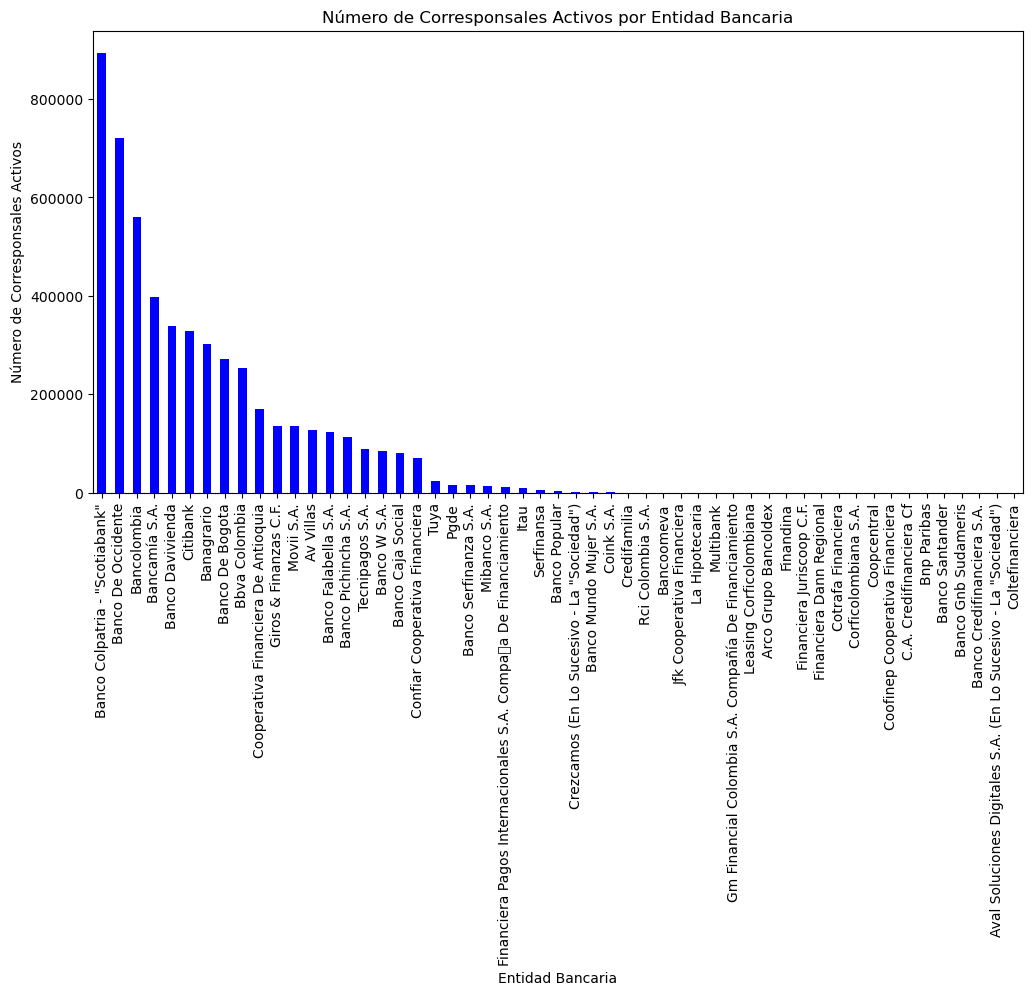

In [11]:
import matplotlib.pyplot as plt

# Filtrar los datos para obtener el número de corresponsales activos por entidad
corresponsales_activos = data.groupby('NOMBRE DE LA  ENTIDAD')['NRO CORRESPONSALES ACTIVOS'].sum()

# Ordenar las entidades por el número de corresponsales activos de forma descendente
corresponsales_activos = corresponsales_activos.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
corresponsales_activos.plot(kind='bar', color='blue')

# Personalizar el gráfico con etiquetas de ejes, título y leyenda
plt.xlabel('Entidad Bancaria')
plt.ylabel('Número de Corresponsales Activos')
plt.title('Número de Corresponsales Activos por Entidad Bancaria')

# Ajustar el espaciado entre las etiquetas del eje x para evitar la superposición
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

Al analizar el número de corresponsales activos por entidad bancaria, podemos comparar la presencia de cada entidad en términos de su cantidad de corresponsales. Observamos que los bancos Colpatria, Banco de Occidente y Bancolombia son los que tienen un mayor número de corresponsales activos, lo que indica que atraen a una gran cantidad de usuarios. En estudios futuros, podríamos investigar más a fondo estos tres bancos y los servicios que ofrecen para identificar cuáles son sus fortalezas y potenciales ventajas competitivas.

c:\Users\jacz0\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\jacz0\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31/03/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\jacz0\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30/06/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\jacz0\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30/09/2018' in DD/MM/YYYY format. Provide format or specif

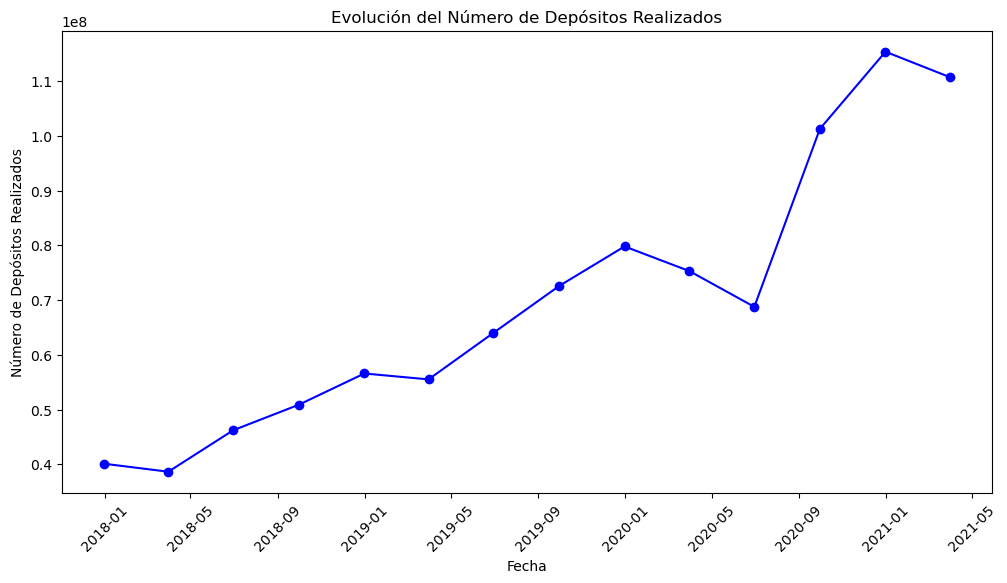

In [12]:
import matplotlib.pyplot as plt

# Convertir la columna 'FECHA DE CORTE' al formato de fecha
data['FECHA DE CORTE'] = pd.to_datetime(data['FECHA DE CORTE'])

# Agrupar los datos por fecha y calcular el número de depósitos realizados
depositos_realizados = data.groupby('FECHA DE CORTE')['NRO DEPOSITOS'].sum()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(depositos_realizados.index, depositos_realizados, marker='o', linestyle='-', color='blue')

# Personalizar el gráfico con etiquetas de ejes y título
plt.xlabel('Fecha')
plt.ylabel('Número de Depósitos Realizados')
plt.title('Evolución del Número de Depósitos Realizados')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Al analizar el gráfico del número de depósitos a lo largo del tiempo, podemos observar un aumento progresivo a medida que pasan los años. Este fenómeno puede respaldar dos posibles hipótesis:

1. El incremento en el número de depósitos podría estar relacionado con el aumento de la inflación nacional y del índice de precios al consumidor (IPC). En este escenario, la creciente cantidad de depósitos reflejaría la necesidad de hacer frente a un mayor costo de vida y a un aumento en los gastos diarios de los individuos.

2. Otra explicación plausible podría ser el aumento de la bancarización y el mayor acceso a productos y servicios bancarios. A medida que más personas se incorporan al sistema financiero y tienen acceso a cuentas bancarias, tarjetas de débito o crédito, y otros medios de transacciones electrónicas, es natural que la cantidad de depósitos se incremente debido a una mayor actividad financiera a nivel nacional.

Estas hipótesis sugieren posibles factores que podrían influir en el aumento del número de depósitos a lo largo del tiempo. Sin embargo, sería necesario realizar un análisis más profundo y considerar otros factores para validar estas suposiciones.

### Análisis Univariado

Comenzaremos con el análisis univariado para evaluar la disponibilidad y utilización de productos financieros en diferentes segmentos de la población en Colombia. Este análisis nos permitirá obtener una visión general de las variables relacionadas con productos financieros y cómo se distribuyen en el conjunto de datos.

Para ello, utilizaremos las columnas relacionadas con productos financieros, como el número de cuentas de ahorro, créditos de consumo, microcréditos, entre otros. El objetivo es examinar estas variables individualmente y calcular estadísticas descriptivas que nos ayuden a entender su comportamiento.

Algunas preguntas que podemos abordar durante el análisis univariado son:

¿Cuál es la distribución del número de cuentas de ahorro en diferentes segmentos de la población?
¿Cuál es el promedio y la variabilidad del monto total de crédito de consumo por segmento de género?
¿Cómo se distribuyen los microcréditos según los rangos de ingresos en la población?
Utilizaremos gráficos y medidas resumen para visualizar y resumir los datos, lo que nos permitirá identificar patrones, tendencias y brechas en la disponibilidad y utilización de productos financieros en los diferentes segmentos de la población en Colombia.

Con este análisis, estaremos en condiciones de obtener insights iniciales sobre la situación actual de inclusión financiera en Colombia y las oportunidades que pueden existir para ofrecer un nuevo producto bancario en un segmento específico de mercado.

##### Análisis del número de cuentas de ahorro:

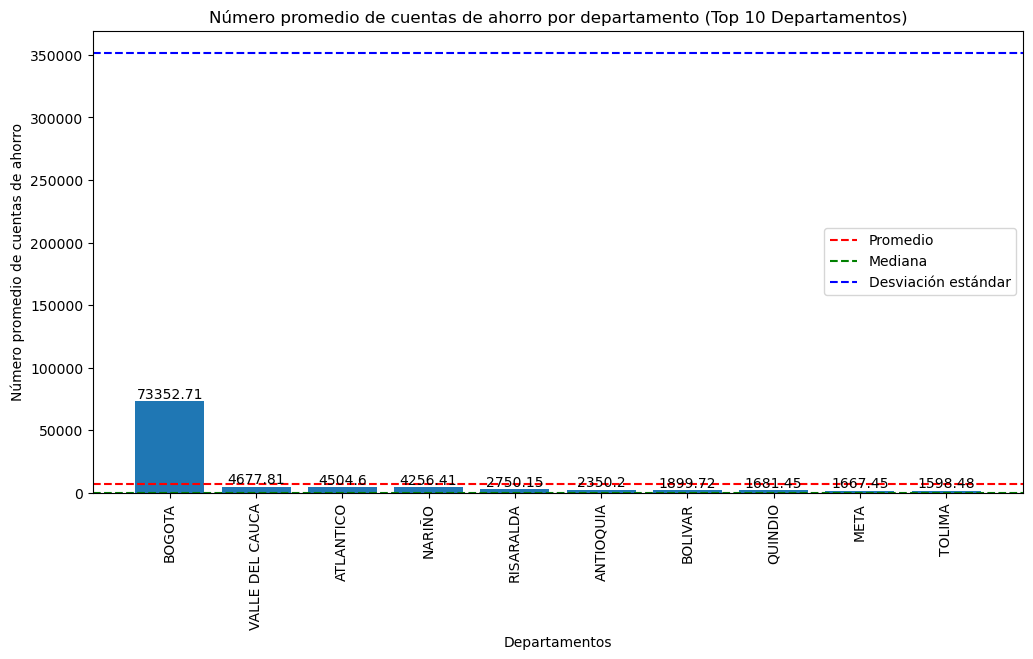

In [28]:
# Seleccionar las columnas relevantes para el análisis
cuentas_ahorro = data["NRO TOTAL "]
departamento = data["DEPARTAMENTO"]

# Filtrar los datos para excluir el departamento "TOTAL NACIONAL"
data_filtered = data[data["DEPARTAMENTO"] != "TOTAL NACIONAL"]

# Agrupar los datos por departamento y calcular el número promedio de cuentas de ahorro
grouped_data = data_filtered.groupby(departamento)["NRO CTA AHORRO HASTA 1 SMMLV"].mean().reset_index()

# Calcular el promedio, la mediana y la desviación estándar del número de cuentas de ahorro en el conjunto de datos
mean = np.mean(cuentas_ahorro)
median = np.median(cuentas_ahorro)
std = np.std(cuentas_ahorro)

# Seleccionar los 10 departamentos principales
top_10_departamentos = grouped_data.nlargest(10, "NRO CTA AHORRO HASTA 1 SMMLV")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_10_departamentos)), top_10_departamentos["NRO CTA AHORRO HASTA 1 SMMLV"])
plt.xlabel("Departamentos")
plt.ylabel("Número promedio de cuentas de ahorro")
plt.title("Número promedio de cuentas de ahorro por departamento (Top 10 Departamentos)")
plt.xticks(range(len(top_10_departamentos)), top_10_departamentos["DEPARTAMENTO"], rotation=90)

# Agregar los números encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Agregar el promedio, la mediana y la desviación estándar como anotaciones en el gráfico
plt.axhline(mean, color='r', linestyle='--', label='Promedio')
plt.axhline(median, color='g', linestyle='--', label='Mediana')
plt.axhline(std, color='b', linestyle='--', label='Desviación estándar')

plt.legend()
plt.show()





El hecho de que la desviación estándar sea alta (en este caso, más de 350,000) indica que hay una gran variabilidad en el número de cuentas de ahorro en los departamentos de Colombia.

La desviación estándar alta sugiere que existen diferencias significativas en el número de cuentas de ahorro entre los departamentos, y que hay una amplia dispersión en los datos. Esto significa que algunos departamentos pueden tener un número muy alto de cuentas de ahorro, mientras que otros tienen un número muy bajo.

En este caso, Bogotá se destaca como un departamento con un alto promedio de cuentas de ahorro en comparación con los demás. Esta diferencia significativa en el promedio de cuentas de ahorro entre Bogotá y los otros departamentos puede ser indicativa de varias situaciones:

- Diferencias económicas: Bogotá podría tener una economía más próspera y una mayor capacidad de ahorro en comparación con otros departamentos. Esto podría deberse a su posición como la capital y el centro financiero del país, donde se concentran más oportunidades económicas.

- Acceso a servicios financieros: Bogotá puede tener una mejor infraestructura bancaria y una mayor disponibilidad de servicios financieros en comparación con otros departamentos, lo que facilita que más personas tengan cuentas de ahorro.

- Educación financiera: Es posible que en Bogotá haya una mayor conciencia y educación financiera, lo que lleva a una mayor adopción de cuentas de ahorro y otros productos financieros.

##### Análisis del monto total de crédito de consumo

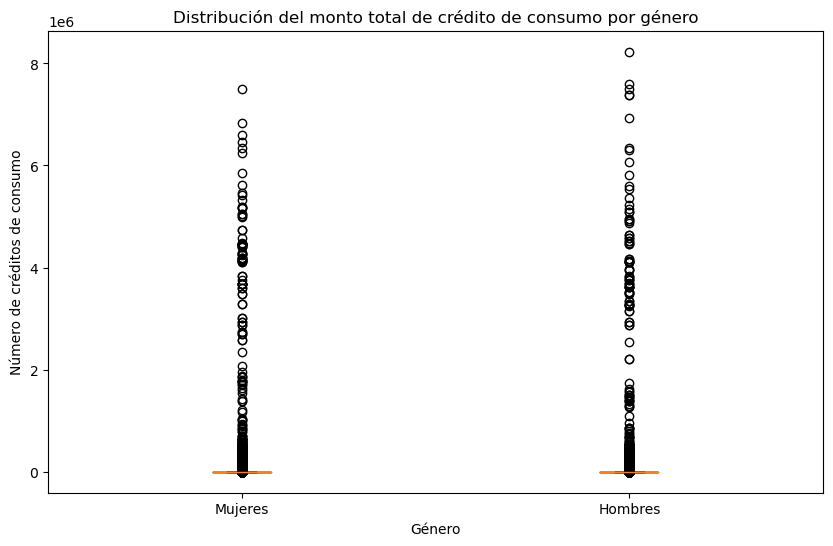

In [38]:
# Crear un subconjunto de datos con las columnas relevantes
df_creditos = data_descartada[['NRO CREDITO CONSUMO MUJERES', 'NRO CREDITO CONSUMO HOMBRES']]

# Crear el gráfico de caja y bigotes
plt.figure(figsize=(10, 6))
plt.boxplot([df_creditos['NRO CREDITO CONSUMO MUJERES'], df_creditos['NRO CREDITO CONSUMO HOMBRES']], labels=['Mujeres', 'Hombres'])
plt.title('Distribución del monto total de crédito de consumo por género')
plt.ylabel('Número de créditos de consumo')
plt.xlabel('Género')
plt.show()

Basándonos en la información proporcionada por el gráfico de caja y bigotes del monto total de crédito de consumo por género, podemos realizar las siguientes observaciones e interpretaciones:

Mediana: Podemos observar que la mediana del número de créditos de consumo para mujeres se encuentra en un rango mayor a la mediana de los hombres. Esto indica que en general, las mujeres tienden a tener un mayor número de créditos de consumo que los hombres.

Cuartiles: La caja del gráfico representa el rango intercuartil (IQR), que es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). En el caso de las mujeres, el IQR parece estar entre aproximadamente 0 y 2 créditos de consumo. Mientras que para los hombres, hay dos segmentos distintos en el IQR, uno entre 0 y 2 créditos y otro entre 3 y 5 créditos. Esto sugiere que hay una mayor variabilidad en la cantidad de créditos de consumo entre los hombres.

Valores atípicos: En el gráfico, los puntos que se encuentran por encima de los "bigotes" representan los valores atípicos o extremos. Podemos observar que tanto hombres como mujeres tienen valores atípicos por encima de 7-8 créditos de consumo. Esto indica que existen individuos tanto en el grupo de hombres como en el grupo de mujeres que tienen un número significativamente mayor de créditos de consumo.

En resumen, el gráfico de caja y bigotes nos muestra que las mujeres tienden a tener un número de créditos de consumo mayor en comparación con los hombres, y también revela una mayor variabilidad en el número de créditos entre los hombres.

##### Análisis de microcréditos según los rangos de ingresos

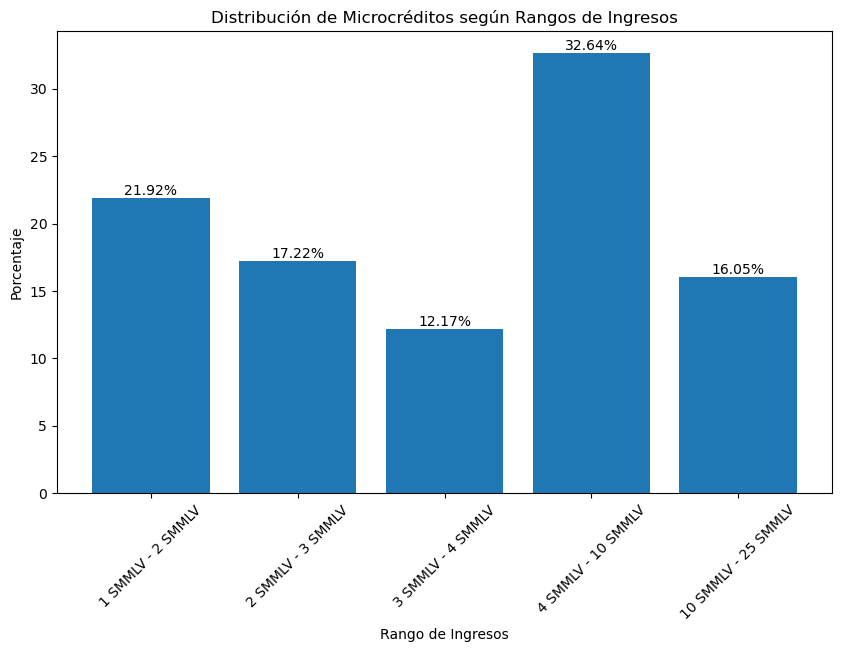

In [46]:
# Definir los rangos de ingresos
rangos_ingresos = ['1 SMMLV - 2 SMMLV', '2 SMMLV - 3 SMMLV', '3 SMMLV - 4 SMMLV', '4 SMMLV - 10 SMMLV', '10 SMMLV - 25 SMMLV']

# Calcular la frecuencia de microcréditos en cada rango de ingresos
frecuencia_por_rango = data_descartada[['NRO MICROCREDITO > 1 SMMLV HASTA 2 SMMLV', 
                           'NRO MICROCREDITO> 2 SMMLV HASTA 3 SMMLV',
                           'NRO MICROCREDITO> 3 SMMLV HASTA 4 SMMLV',
                           'NRO MICROCREDITO> 4 SMMLV HASTA 10 SMMLV',
                           'NRO MICROCREDITO> 10SMMLV HASTA 25SMMLV']].sum()

# Calcular el porcentaje de microcréditos en cada rango de ingresos
porcentaje_por_rango = frecuencia_por_rango / frecuencia_por_rango.sum() * 100

# Crear un gráfico de barras para visualizar la distribución de microcréditos según los rangos de ingresos
plt.figure(figsize=(10, 6))
bars = plt.bar(rangos_ingresos, porcentaje_por_rango)
plt.xlabel('Rango de Ingresos')
plt.ylabel('Porcentaje')
plt.title('Distribución de Microcréditos según Rangos de Ingresos')
plt.xticks(rotation=45)

# Agregar el valor total sobre cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.show()


Podemos observar que los rangos de ingresos de 4 SMMLV - 10 SMMLV y 1 SMMLV - 2 SMMLV son los que presentan la mayor proporción de microcréditos, lo que sugiere que estos grupos de ingresos tienen una necesidad significativa de financiamiento a través de microcréditos. Esto puede deberse a diferentes razones, como la falta de acceso a otros tipos de crédito o la necesidad de financiamiento para emprender proyectos o cubrir necesidades urgentes.

### Análisis bivariado

En este caso, nos interesa investigar la relación entre el número de cuentas de ahorro y el monto total de crédito de consumo en diferentes segmentos de la población.

Las cuentas de ahorro son instrumentos financieros populares que permiten a las personas ahorrar dinero y acumular intereses. Por otro lado, el crédito de consumo se refiere a los préstamos que las personas solicitan para financiar sus necesidades personales, como la compra de bienes de consumo duradero, la educación o la atención médica.

Al analizar la relación entre el número de cuentas de ahorro y el monto total de crédito de consumo, podemos obtener información valiosa sobre los hábitos de ahorro y endeudamiento de diferentes segmentos de la población. Esto puede ayudar a identificar patrones, tendencias y posibles oportunidades para diseñar productos financieros que se ajusten mejor a las necesidades y preferencias de cada segmento.

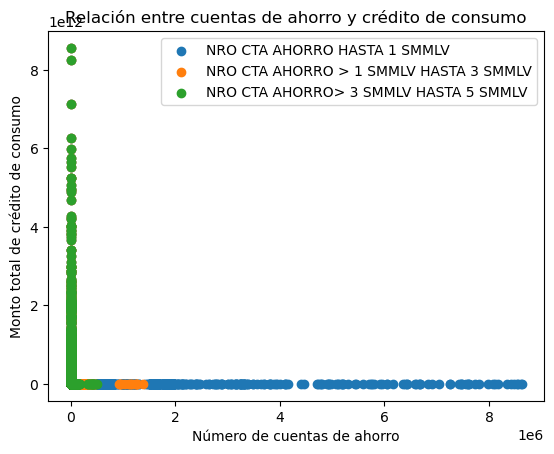

In [47]:
# Datos necesarios: Número de cuentas de ahorro y monto total de crédito de consumo
num_cuentas_ahorro = ['NRO CTA AHORRO HASTA 1 SMMLV', 'NRO CTA AHORRO > 1 SMMLV HASTA 3 SMMLV', 'NRO CTA AHORRO> 3 SMMLV HASTA 5 SMMLV']
monto_credito_consumo = ['MONTO TOTAL CREDITO CONSUMO']

# Crear el gráfico de dispersión
plt.scatter(data_descartada[num_cuentas_ahorro[0]], data_descartada[monto_credito_consumo[0]], label=num_cuentas_ahorro[0])
plt.scatter(data_descartada[num_cuentas_ahorro[1]], data_descartada[monto_credito_consumo[0]], label=num_cuentas_ahorro[1])
plt.scatter(data_descartada[num_cuentas_ahorro[2]], data_descartada[monto_credito_consumo[0]], label=num_cuentas_ahorro[2])

# Establecer etiquetas y título del gráfico
plt.xlabel('Número de cuentas de ahorro')
plt.ylabel('Monto total de crédito de consumo')
plt.title('Relación entre cuentas de ahorro y crédito de consumo')

# Mostrar leyenda y gráfico
plt.legend()
plt.show()

El análisis muestra que en los rangos de ingresos más altos (> 3 SMMLV hasta 5 SMMLV), hay pocas cuentas de ahorro activas con un nivel de crédito de consumo bajo. Mientras tanto, en los rangos de ingresos más bajos (hasta 1 SMMLV), hay más cuentas activas con niveles de crédito de consumo también bajos, pero con una variación en el número de cuentas. Estos resultados sugieren que el nivel de crédito de consumo está relacionado con el rango de ingresos, y aquellos con ingresos más altos tienden a tener un nivel de crédito de consumo más bajo.

Calcularemos coeficientes de correlación, como el coeficiente de correlación de Pearson, para cuantificar las relaciones entre variables y determinar su fuerza y dirección.

1. Número de cuentas de ahorro vs. Monto total de crédito de consumo: Esto podría determinar si existe una relación entre el número de cuentas de ahorro que posee una persona y el monto total de crédito de consumo que ha obtenido.

In [48]:
# Seleccionar las columnas de interés
cuentas_ahorro = data['NRO TOTAL CTA AHORROS']
credito_consumo = data['MONTO TOTAL CREDITO CONSUMO']

# Calcular el coeficiente de correlación de Pearson
correlation = cuentas_ahorro.corr(credito_consumo, method='pearson')

print("Coeficiente de correlación de Pearson:", correlation)

Coeficiente de correlación de Pearson: -0.0014551831006582056


El coeficiente de correlación de Pearson obtenido, -0.0014551831006582056, indica una correlación muy cercana a cero entre el número de cuentas de ahorro y el monto total de crédito de consumo. Esto sugiere que no existe una relación lineal fuerte entre estas dos variables.

En resumen, en base al coeficiente de correlación obtenido, no se puede afirmar que exista una relación significativa entre el número de cuentas de ahorro y el monto total de crédito de consumo en los datos analizados.

2. Número de microcréditos vs. Monto total de crédito de consumo: Esta combinación permitirá evaluar si hay alguna relación entre la cantidad de microcréditos adquiridos y el monto total de crédito de consumo.

In [53]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Obtener las columnas relevantes para el análisis
numero_microcreditos = data_descartada['NRO TOTAL MICROCREDITO ']
monto_credito_consumo = data_descartada['MONTO TOTAL CREDITO CONSUMO']

# Calcular el coeficiente de correlación de Pearson
correlation_coef, p_value = pearsonr(numero_microcreditos, monto_credito_consumo)

# Imprimir el coeficiente de correlación
print("Coeficiente de correlación de Pearson:", correlation_coef)

Coeficiente de correlación de Pearson: -0.001118885338658491


No se observa una asociación significativa entre la cantidad de microcréditos adquiridos y el monto total de crédito de consumo. Esto significa que el número de microcréditos no parece tener un impacto directo en el monto total de crédito de consumo

3. Número de cuentas de ahorro vs. Número de microcréditos: Revisar si hay alguna relación entre la cantidad de cuentas de ahorro y la cantidad de microcréditos que una persona tiene.

In [54]:
# Crear un DataFrame con los datos relevantes
data = data_descartada[['NRO TOTAL CTA AHORROS', 'NRO TOTAL MICROCREDITO ']]

# Eliminar filas con valores faltantes si es necesario
data = data.dropna()

# Calcular el coeficiente de correlación de Pearson
correlation, _ = pearsonr(data['NRO TOTAL CTA AHORROS'], data['NRO TOTAL MICROCREDITO '])

print("Coeficiente de correlación de Pearson:", correlation)

Coeficiente de correlación de Pearson: -0.0011986736189907548


Indica una correlación muy débil y cercana a cero entre el número de cuentas de ahorro y el número de microcréditos. Esto sugiere que no existe una relación significativa entre estas dos variables.

Basado en los resultados obtenidos hasta ahora, donde no se encontraron correlaciones significativas entre las variables analizadas, podría ser interesante explorar otros tipos de análisis bivariados para buscar posibles relaciones o patrones entre las variables. Creare un análisis de regresión.

#####  Análisis de Regresión

In [58]:
import statsmodels.api as sm

# Divide los datos en variables independientes (X) y variable dependiente (y)
X = data_descartada[['NRO CREDITO CONSUMO MUJERES', 'NRO CREDITO CONSUMO HOMBRES', 'NRO MICROCREDITO MUJERES', 'NRO MICROCREDITO HOMBRES', 'NRO CTA AHORRO ACTIVAS']]
y = data_descartada['MONTO TOTAL CREDITO CONSUMO']

# Añade una columna de unos como constante para el término independiente
X = sm.add_constant(X)

# Ajusta el modelo de regresión lineal utilizando StatsModels
model = sm.OLS(y, X)
results = model.fit()

# Imprime los resultados del modelo
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     MONTO TOTAL CREDITO CONSUMO   R-squared:                       0.569
Model:                                     OLS   Adj. R-squared:                  0.569
Method:                          Least Squares   F-statistic:                 1.591e+05
Date:                         Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                                 19:31:12   Log-Likelihood:            -1.5475e+07
No. Observations:                       603232   AIC:                         3.095e+07
Df Residuals:                           603226   BIC:                         3.095e+07
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

En el resultado del modelo de regresión, se presentan los coeficientes estimados para cada variable independiente, junto con sus errores estándar, valores t, valores p y los intervalos de confianza del 95%.

Aquí hay una interpretación de los resultados para cada variable independiente:

Para la variable constante, el coeficiente estimado es de 1.207e+09. Esto representa el valor esperado del monto total de crédito de consumo cuando todas las demás variables independientes son iguales a cero. El valor p asociado es cero, lo que indica que es estadísticamente significativo.

Para la variable "NRO CREDITO CONSUMO MUJERES", el coeficiente estimado es de -1.145e+06. Esto significa que, manteniendo todas las demás variables constantes, se espera que un incremento de una unidad en el número de créditos de consumo de mujeres esté asociado con una disminución de aproximadamente 1.145e+06 en el monto total de crédito de consumo. El valor p asociado es cero, lo que indica que es estadísticamente significativo.

Para la variable "NRO CREDITO CONSUMO HOMBRES", el coeficiente estimado es de 1.837e+06. Esto significa que, manteniendo todas las demás variables constantes, se espera que un incremento de una unidad en el número de créditos de consumo de hombres esté asociado con un aumento de aproximadamente 1.837e+06 en el monto total de crédito de consumo. El valor p asociado es cero, lo que indica que es estadísticamente significativo.

Para las variables "NRO MICROCREDITO MUJERES", "NRO MICROCREDITO HOMBRES" y "NRO CTA AHORRO ACTIVAS", los coeficientes estimados son cercanos a cero y los valores p asociados no son estadísticamente significativos. Esto indica que no hay una relación lineal significativa entre estas variables y el monto total de crédito de consumo.

Es importante tener en cuenta que el modelo de regresión lineal asume una relación lineal entre las variables independientes y la variable dependiente.